In [ ]:
import pubchempy as pcp
import pandas as pd
import numpy as np
from multiprocessing import freeze_support
from rdkit import Chem
from mordred import Calculator, descriptors
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input = 'data/'
df_odors = pd.read_excel(input + 'structured-dataset.xlsx', header=1, usecols='A', sheet_name='Mos_OR')

odors = df_odors.odor.unique()
np.savetxt(input + 'odor-list.csv', odors, delimiter='#', fmt=('%s'))


In [3]:
odors = np.loadtxt(input + 'odor-list.csv', delimiter="#", dtype='str')
data_props = ['odor_sheet_name', 'odor_pubchem_name', 'cid', 'iupac_name', 'isomeric_smiles', 'atom_stereo_count',
                'bond_stereo_count', 'complexity', 'covalent_unit_count', 'defined_atom_stereo_count', 
                'defined_bond_stereo_count', 'exact_mass', 'h_bond_acceptor_count', 'h_bond_donor_count', 
                'heavy_atom_count', 'molecular_weight', 'monoisotopic_mass', 'rotatable_bond_count', 'tpsa', 
                'undefined_atom_stereo_count', 'xlogp']
data = pd.DataFrame(columns=data_props)   # output dataframe
data['odor_sheet_name'] = pd.Series(odors)

print(odors[[3, 36, 67, 68, 76, 91, 92, 108, 109, 111]])
### Name replacement for CID
odors[3] = 'gamma-decalactone'
odors[36] = 'linalyl oxide'
odors[67] = 'methyl-2-methylbenzoate'
odors[68] = '2-ethyltoluene'
odors[76] = '2-iso-butylthiazole'
odors[91] = 'cis-2-Hexen-1-ol'
odors[92] = 'cis-3-Hexen-1-ol'
odors[108] = 'androstenone'
odors[109] = 'androstenol'
odors[111] = 'delphinidin'

['g-decalactone' 'Linalool Oxide' 'methyl-2-methyl benzoate'
 '2-ethyl-toluene' '2-iso-butyl-thiazole' 'Z2-hexenol' 'Z3-hexenol'
 '5α-androst-16-one' '5α-androsten-3α-ol' 'paraffin oil']


In [4]:
## Get properties from pubchem
for i in range(len(odors)):  # number of odors
    odor = odors[i]
    compound = pcp.get_compounds(odor, 'name')
    data.loc[i, "odor_pubchem_name"] = odor
    for j in range(2, len(data_props)):
        data.loc[i, data_props[j]] = getattr(compound[0], data_props[j])
    print([odor, i])
data.to_csv(input + 'odor-pubchem-data.csv', sep='#', index=False)

['ammonia', 0]
['putrescine', 1]
['cadaverine', 2]
['gamma-decalactone', 3]
['d-decalactone', 4]
['Acetic Acid', 5]
['propanoic acid', 6]
['butanoic acid', 7]
['pentanoic acid', 8]
['Hexanoic acid', 9]
['heptanoic acid', 10]
['octanoic acid', 11]
['nonanoic acid', 12]
['decanoic acid', 13]
['dodecanoic acid', 14]
['tridecanoic acid', 15]
['Myristic Acid', 16]
['hexadecanoic acid', 17]
['octadecanoic acid', 18]
['L-(+)-Lactic acid', 19]
['2-oxopropanoic acid', 20]
['isobutanoic acid', 21]
['2-oxobutanoic acid', 22]
['3-Methylbutanoic acid', 23]
['2-oxopentanoic acid', 24]
['2-oxohexanoic acid', 25]
['3-Methyl-2-hexenoic acid', 26]
['7-octenoic acid', 27]
['cis-9-octadecenoic acid', 28]
['dimethyl sulfide', 29]
['(-)-carvone', 30]
['(+)-carvone', 31]
['(-)-fenchone', 32]
['(+)-fenchone', 33]
['citronellal', 34]
['geraniol', 35]
['linalyl oxide', 36]
['geranyl acetate', 37]
['hexanal', 38]
['heptanal', 39]
['octanal', 40]
['nonanal', 41]
['decanal', 42]
['(E)-2-hexenal', 43]
['acetone', 4

In [5]:
data = pd.read_csv(input + 'odor-pubchem-data.csv', sep='#')
data['cid'] = data['cid'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   odor_sheet_name              112 non-null    object 
 1   odor_pubchem_name            112 non-null    object 
 2   cid                          112 non-null    object 
 3   iupac_name                   112 non-null    object 
 4   isomeric_smiles              112 non-null    object 
 5   atom_stereo_count            112 non-null    int64  
 6   bond_stereo_count            112 non-null    int64  
 7   complexity                   112 non-null    float64
 8   covalent_unit_count          112 non-null    int64  
 9   defined_atom_stereo_count    112 non-null    int64  
 10  defined_bond_stereo_count    112 non-null    int64  
 11  exact_mass                   112 non-null    float64
 12  h_bond_acceptor_count        112 non-null    int64  
 13  h_bond_donor_count  

In [6]:
mol = data.isomeric_smiles.apply(Chem.MolFromSmiles)

In [7]:
freeze_support()
calc = Calculator(descriptors)
data_temp = calc.pandas(mol.tolist())
data = data.join(data_temp)
data.to_csv(input + 'odor-pubchem-mordred-data.csv', sep='#', index=False)
data.info()

100%|█████████████████████████████████████████| 112/112 [00:04<00:00, 23.37it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Columns: 1847 entries, odor_sheet_name to mZagreb2
dtypes: bool(2), float64(545), int64(343), object(957)
memory usage: 1.6+ MB


In [8]:
data = pd.read_csv(input + 'odor-pubchem-mordred-data.csv', sep='#')

## Convert cid to str
data['cid'] = data['cid'].astype(str)

## Convert error values to missing data
for c in data.columns[5:]:
    data[c] = pd.to_numeric(data[c], errors='coerce')

## Drop columns with missing values
data = data.dropna(how='any', axis=1)

## Drop columns with only 1 value or variance < 0.005
test_list = data.std(numeric_only=True, axis=0) < 0.005
res = [x+5 for x in list(filter(lambda i: test_list[i], range(len(test_list))))]
cols_to_drop = data.columns[res]
data = data.drop(cols_to_drop, axis=1)

## Drop boolean columns
data = data.select_dtypes(exclude='bool')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Columns: 650 entries, odor_sheet_name to mZagreb2
dtypes: float64(532), int64(113), object(5)
memory usage: 568.9+ KB


In [9]:
def remove_collinear_features(df, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        df: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Create correlation matrix
    corr_matrix = df.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # Find features with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    # Drop features 
    df = df.drop(to_drop, axis=1)

    return df

<AxesSubplot:>

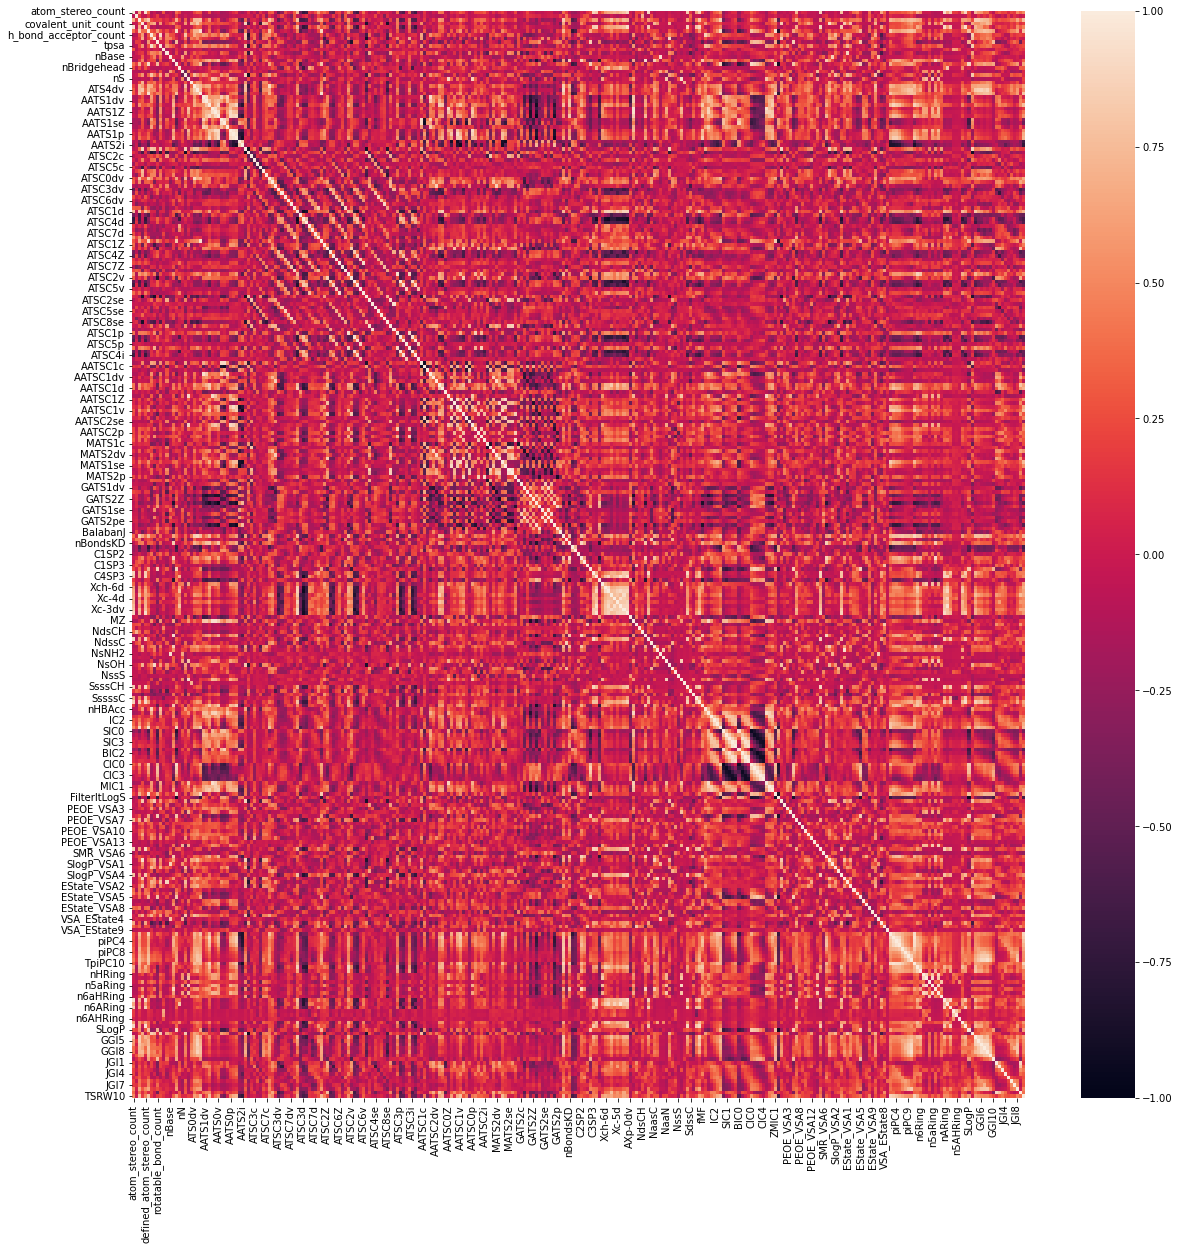

In [10]:
## Remove features with correlations greater than 0.95
data_select = remove_collinear_features(data, 0.95)
plt.figure(figsize=(20, 20))
corr = data_select.corr()
sns.heatmap(corr, vmin=-1, vmax=1)

In [11]:
data_select.to_csv(input + 'odor-selected-descriptors-data.csv', sep='#', index=False)

In [12]:
data_select.columns

Index(['odor_sheet_name', 'odor_pubchem_name', 'cid', 'iupac_name',
       'isomeric_smiles', 'atom_stereo_count', 'bond_stereo_count',
       'complexity', 'covalent_unit_count', 'defined_atom_stereo_count',
       ...
       'JGI1', 'JGI2', 'JGI3', 'JGI4', 'JGI5', 'JGI6', 'JGI7', 'JGI8', 'JGT10',
       'TSRW10'],
      dtype='object', length=300)

In [13]:
data_select.describe()

,atom_stereo_count,bond_stereo_count,complexity,covalent_unit_count,defined_atom_stereo_count,exact_mass,h_bond_acceptor_count,h_bond_donor_count,rotatable_bond_count,tpsa,...,JGI1,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGT10,TSRW10
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,...,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.267857,0.071429,95.878571,1.008929,0.178571,129.153007,1.589286,0.589286,3.223214,27.965179,...,0.202542,0.071455,0.042147,0.032124,0.017984,0.006184,0.003768,0.002143,0.379955,36.776269
std,0.948988,0.258697,76.923146,0.094491,0.912518,52.814504,0.865282,0.754011,3.322622,15.448063,...,0.111000,0.038788,0.027725,0.031116,0.019037,0.010333,0.007076,0.005307,0.156615,10.689811
min,0.000000,0.000000,0.000000,1.000000,0.000000,17.026549,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,51.950000,1.000000,0.000000,100.088815,1.000000,0.000000,1.000000,17.100000,...,0.125000,0.044444,0.026339,0.010000,0.000000,0.000000,0.000000,0.000000,0.251794,31.176778
50%,0.000000,0.000000,76.950000,1.000000,0.000000,121.562964,2.000000,1.000000,2.500000,26.300000,...,0.187500,0.074074,0.041667,0.026667,0.014881,0.000000,0.000000,0.000000,0.392335,35.742916
75%,0.000000,0.000000,115.000000,1.000000,0.000000,150.077176,2.000000,1.000000,4.250000,37.300000,...,0.260870,0.093254,0.055556,0.040000,0.028026,0.010436,0.004908,0.000000,0.486111,40.991311
max,7.000000,1.000000,464.000000,2.000000,7.000000,338.019330,7.000000,6.000000,16.000000,122.000000,...,0.500000,0.158730,0.130952,0.151111,0.062500,0.040000,0.027778,0.024891,0.768398,69.126315
